<a href="https://colab.research.google.com/github/Adachi-Yoshitaka/clustering/blob/main/pcv_06_3_spectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 実践コンピュータビジョン
# 6章 画像のクラスタリング
## 6.3 スペクトラルクラスタリング
テキストp.147

スペクトラルクラスタリング法は、k平均法や階層クラスタリング法とは異なるアプローチでクラスタリングを行う。<br>
n個の要素の間の類似度行列を、要素間の類似度を成分としたnxnの行列とする。類似度行列のスペクトラムを用いて、<br>
クラスタリングを行う。

In [1]:
!git clone --recursive https://github.com/Adachi-Yoshitaka/clustering

Mounted at /content/drive


In [2]:
%cd /content/clustering

/content/drive/My Drive/pcv_note/chap6


In [3]:
import numpy as np
from numpy import random
from scipy import linalg
from PIL import Image
import matplotlib.pyplot as plt
from scipy.cluster import vq
%matplotlib inline

In [4]:
import pickle
import imtools
import hcluster

In [5]:
# 画像データのファイルパスのリスト
imlist = imtools.get_imlist('selected_fontimages/')
imnbr = len(imlist)
imnbr

66

In [6]:
# モデルのファイルを読み込む
with open('font_pca_modes.pkl','rb') as f:
    immean = pickle.load(f)
    V = pickle.load(f)
    

In [7]:
# 平板化した画像を格納する行列を作る
immatrix = np.array([np.array(Image.open(im)).flatten()
                  for im in imlist],'f')

In [8]:
# 第40主成分までを射影する
immean = immean.flatten()
projected = np.array([np.dot(V[:40],immatrix[i]-immean)
                   for i in range(imnbr)])

In [9]:
# クラスタリングする画像の数
n = len(projected)
n

66

In [10]:
# 距離行列を計算する
# 対角要素は０になり、(i,j)成分と(j,i)成分が等しい対称行列になる
S = np.array([[ np.sqrt(np.sum((projected[i]-projected[j])**2))
          for i in range(n) ] for j in range(n)], 'f')
S[:4,:4]

array([[   0.    , 3288.0815, 2653.4365, 3505.884 ],
       [3288.0815,    0.    , 1870.8931, 3569.4316],
       [2653.4365, 1870.8931,    0.    , 3893.487 ],
       [3505.884 , 3569.4316, 3893.487 ,    0.    ]], dtype=float32)

In [11]:
# ラプラシアン行列を作成する
rowsum = np.sum(S,axis=0)
rowsum.shape

(66,)

In [12]:
D = np.diag(1 / np.sqrt(rowsum))
D

array([[0.00221557, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00223156, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00223077, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00220127, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00217703,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00219774]], dtype=float32)

In [13]:
# n x n の単位行列
I = np.identity(n)
I

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
# ラプラシアン行列の計算
L = I - np.dot(D, np.dot(S,D))
L

array([[ 1.        , -0.01625684, -0.01311441, ..., -0.01653741,
        -0.0183979 , -0.01762038],
       [-0.01625684,  1.        , -0.0093135 , ..., -0.01560172,
        -0.0165224 , -0.01247058],
       [-0.01311441, -0.0093135 ,  1.        , ..., -0.01774607,
        -0.01833995, -0.01611203],
       ...,
       [-0.01653741, -0.01560172, -0.01774608, ...,  1.        ,
        -0.01292781, -0.01451051],
       [-0.0183979 , -0.0165224 , -0.01833995, ..., -0.01292781,
         1.        , -0.01661527],
       [-0.01762038, -0.01247058, -0.01611203, ..., -0.01451051,
        -0.01661527,  1.        ]])

In [15]:
# Lの固有ベクトルを計算する
U,sigma,V = linalg.svd(L)

In [16]:
# クラスタリングの実行
k = 5

# 最初のk個の固有ベクトルを列として並べて
# 特徴量ベクトルを作成する
features = np.array(V[:k]).T

# k-means
features = vq.whiten(features)
centroids,distortion = vq.kmeans(features,k)
code,distance = vq.vq(features,centroids)

code= 0


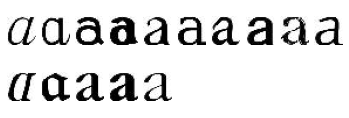

code= 1


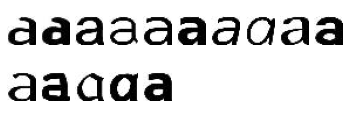

code= 2


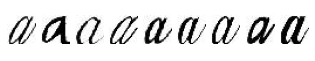

code= 3


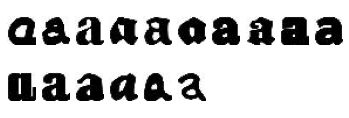

code= 4


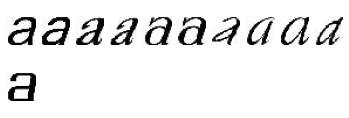

In [17]:
# クラスタを描画する
for c in range(k):
    ind = np.where(code==c)[0]
    plt.figure()
    print('code=', c)
    for i in range(np.minimum(len(ind),39)):
        im = Image.open(imlist[ind[i]])
        plt.subplot(4,10,i+1)
        plt.gray()
        plt.imshow(np.array(im))
        plt.axis('equal')
        plt.axis('off')
    plt.show()

In [18]:
projected[0].shape

(40,)